# El método de Newton

In [97]:
using PyPlot
using Gadfly

In [32]:
workspace()
using Derivatives
using Intervals
using DerivativesTest

    ^(Derive,Real) at /home/estudiante/MetodosNumericosAvanzados/Tareas/Derivatives.jl:87
is ambiguous with: 
    ^(Any,Integer) at intfuncs.jl:86.
To fix, define 
    ^(Derive,Integer)
before the new definition.


Prueba básicas de derivación:
10 facts verified.


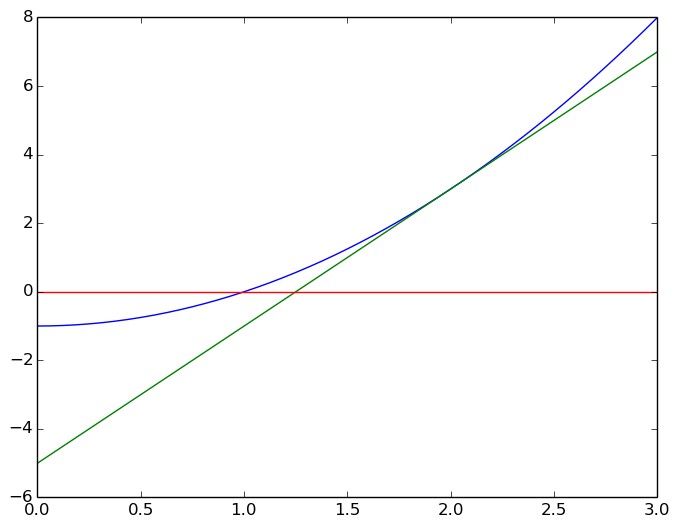

3-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f39b119c490>
 PyObject <matplotlib.lines.Line2D object at 0x7f39b119c710>
 PyObject <matplotlib.lines.Line2D object at 0x7f39b119cdd0>

In [30]:
x1 = [i for i in 0:.0625:3]
y1 = [(x-1)*(x+1) for x in x1]
y2 = [4(x-2)+3 for x in x1]
y3 = [0 for x in x1]
plot(x1,y1,x1,y2,x1,y3)

Arriba se muestra la función $x^2-1$ en $x\in[0,3]$, junto con la recta tangente en el punto $x_0=2$ el cual tomo como "adivinanza". Se puede ver gráficamente que la intersección de la recta tangente con el eje $x$ nos dá un punto más cercano a la raíz que se busca. Si resuelvo para este corte, $4(x_1-2)+3=0$ obtengo $x_1=\frac{5}{4}$. Si tomo la recta tangente en ee punto obtengo:

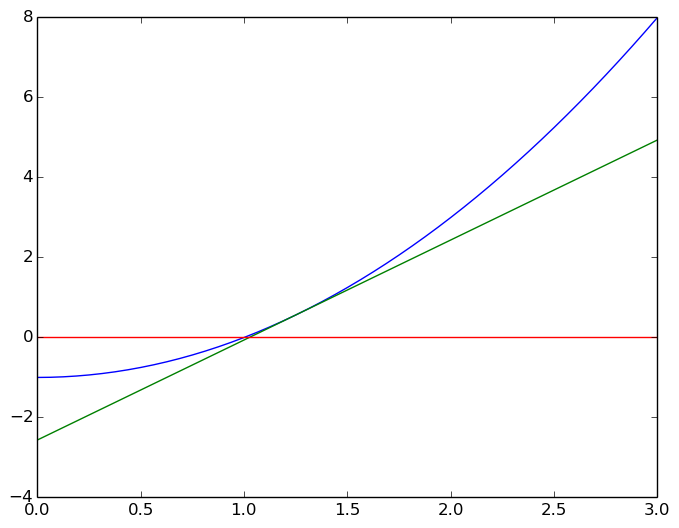

3-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f39b1017090>
 PyObject <matplotlib.lines.Line2D object at 0x7f39b1017310>
 PyObject <matplotlib.lines.Line2D object at 0x7f39b10179d0>

In [32]:
x1 = [i for i in 0:.0625:3]
y1 = [(x-1)*(x+1) for x in x1]
y2 = [2.5(x-1.25)+(1.25^2-1) for x in x1]
y3 = [0 for x in x1]
plot(x1,y1,x1,y2,x1,y3)

Ahora el corte está aún más cerca de la raíz! Como la forma de la recta tangente es $f'(a)(x-a)+f(a)$, al buscar resolver para el corte $a$ es igual a el paso $n$ de $x$ y la $x$ de arriba es el paso $n+1$. Si despejo obtengo: $x_{n+1}= x_n-\frac{f(x_n)}{f'(x_n)}$, la cual es una expresión que puedo iterar.

Recordemos que el *método de Newton* es un método numérico *iterativo* para encontrar raíces de funciones (continuamente) diferenciables.

Sea $f$ la función cuyas raíces queremos encontrar.
La idea es que empecemos desde una adivinanza inicial $x_0$, y que la siguiente aproximación $x_1$ esté donde la recta tangente a la curva $f(x)$ en $x_0$ corte el eje $y$. 

[1] Esboza la geometría, tanto a mano como en la computadora, y así encuentra la expresión de $x_{n+1}$ en términos de $x_n$.

[2] Implementa la iteración para calcular la raíz cuadrada y la raíz cúbica de $2$.  ¿Cuál es una condición razonable de terminación del algoritmo?

[3] Haz un módulo para llevar a cabo diferenciación automática (usando el código del notebook correspondiente) y utilízalo para implementar el método.

Derive(Interval(1.0,8.0),Interval(3.0,12.0))

Ahora escribo una funcíon que lleve a cabo este procedimiento. Aprovecho el modulo de Derivadas que ya está hecho.

In [47]:
f(x) = x^2-1

function NewtonMethod(x,tol,g::Function) #x en este caso es la "adivinanza" inicial
    
    i = 0
    
    while(abs(g(x))>tol)
        

        x-=GetFunctionValue(g,x)/GetDerivativeValue(g,x)
        
        i+=1
        
        if(i==70)
            break
        end
    end
    
    return(x)
    
end
            
            
        
NewtonMethod(17,1e-15,f1)      
        

1.4142135623730951

como me interesa encontrar la raíz cuadrada de 2, simplemente es quivalente a encontrar la raíz positiva de $x^2-2$

In [34]:
f1(x) = x^2-2
NewtonMethod(2,1e-16,f1)

Hice 70 iteraciones
Posible raíz en el punto x = 1.414213562373095, en este punto f = -4.440892098500626e-16


In [24]:
1.4142135623730951 == sqrt(2)
NewtonMethod(2,1e-15,f1)

Hice 5 iteraciones
Posible raíz en el punto x = 1.4142135623730951, en este punto f = 4.440892098500626e-16


Con una tolerancia de $10^{-16}$ puedo llegar a un valor que Julia considera equivalente al suyo. Para la raíz cúbica basta con definir una nueva función

In [26]:
f3(x) = x^3-2
NewtonMethod(2,1e-16,f3)

Hice 6 iteraciones
Posible raíz en el punto x = 1.2599210498948732, en este punto f = 0.0


In [30]:
1.2599210498948732 == 2.0^(1/3)

true

El método de Newton **puede fallar**:

[4] Utiliza el mismo método para la función *compleja* $f(z) = z^3 - 1$. Empezando desde distintos números complejos $a + bi$, itera el algoritmo para ver a cuál raíz converge, y colorea el punto inicial de manera correspondiente. [Para esto, se recomienda construir una matriz y utilizar la función `pcolor` de `PyPlot`.]

Interpreta el resultado.

In [74]:
fc(x)=x^3-1

NewtonMethod(2+7im,1e-16,fc)

-0.5 + 0.8660254037844386im

In [94]:
M=zeros(Complex{Float64},100,100)

for i = 1:100
    for j = 1:100
        M[i,j]= NewtonMethod((i-50)+(j-50)*im,1e-16,fc)
    end
end
        

In [98]:
spy(M)


InexactError: InexactError()

## Dimensión superior

[5] Desarrolla e implementa el método de Newton para funciones $\mathbf{f}: \mathbb{R}^n \to \mathbb{R}^n$. Para hacerlo, toma una adivinaza $\mathbf{x}_n$ y resuelve la ecuación $\mathbf{f}(\mathbf{x}_{n+1}) = \mathbf{0}$, con $\mathbf{x}_{n+1} = \mathbf{x}_n + \delta \mathbf{x}_n$.

[6] Utiliza tu algoritmo para calcular raíces de funciones conocidas multidimensionales.